In [1]:
# Load packages
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import numpy as np
import pandas as pd
pd.set_option('max_rows', 6)
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
# import cmocean.cm as cmo
import csv
import statsmodels.api as sm
from scipy import stats

# mpl.rcParams['mathtext.fontset'] = 'cm'
# mpl.rcParams['mathtext.rm'] = 'serif'

x = "Year CE"
phe = r'$\mathrm{\delta}^{15}$N Phe ('u"\u2030)"
eaa_neaa = ['Phe', 'Thr', 'Ile', 'Leu', 'Val', 'Asx', 'Glx', 'Pro', 'Ala', 'Ser', 'Gly'] # For Essential/Non-Essential ordering
tr_srcaa = ['Glu', 'Asp', 'Ala', 'Ile', 'Leu', 'Pro', 'Val', 'Gly', 'Ser', 'Lys', 'Tyr', 'Phe', 'Thr'] # For Trophic/Source AA ordering
n = r'$\mathrm{\delta}^{15}$N ['u"\u2030]"
c = r'$\mathrm{\delta}^{13}$C ['u"\u2030]"
deg = u'SST [\u00B0C]'

# Import data
path1 = '~/Documents/GitHub/data/schiff_bulk_years_07-05-2020.csv'
# path2 = '~/Documents/GitHub/data/schiff_bulk_years_jack4907_12-15-2019.csv'
# path3 = '~/Documents/GitHub/data/schiff_bulk_years_sav_12-15-2019.csv'
# path4 = '~/Documents/GitHub/data/schiff_bulk_years_stetson_12-15-2019.csv'
# path5 = '~/Documents/GitHub/data/schiff_bulk_years_sav_12-22-2019.csv'

df = pd.read_csv(path1, comment = '#')
df.rename(columns={"d15n.vs.air": "d15n", "d13c.vs.vpdb": "d13c", "linear.ad" : "yrAD", 
                   "coral.id" : "coral", "sample.no." : "sample",
                  "secondary.ad" : "yrAD2", "distance..mm." : "distance"}, inplace = True)

# Round yrAD column to make things easier
df.yrAD = df.yrAD.round(0)

# df_jack4684 = df[df.coral == 'jack-4684-bc-unk']
# df_jack4686t1 = df[df.coral == 'jack-4686-bc-d1-t1']

df_stet = df[df.coral == 'stet-4904-bc1-d2']
df_jack4907 = df[df.coral == 'jack-4907-bc1-d3']
df_jack_usgs = df[df.coral == 'jack-4907-bc1-d1']
df_sav = df[df.coral == 'sav-4902-bc1-unk']
df_jack4684 = df[df.coral == 'jack-4684-bc-unk']
df_jack4686 = df[df.coral == 'jack-4686-bc1-d1-t1']
df_jack4686_mill = df[df.coral == 'jack-4686-bc-d1-t1']

print(df)

                    coral sampler  sample  distance  d15n   d13c treatment  \
0        jack-4907-bc1-d3    john       1     0.032  9.43 -15.24         a   
1        jack-4907-bc1-d3    john       2     0.064  9.78 -15.38         a   
2        jack-4907-bc1-d3    john       3     0.096  9.41 -15.14         a   
...                   ...     ...     ...       ...   ...    ...       ...   
1227  jack-4686-bc1-d1-t1    john     123  5904.000   NaN    NaN       NaN   
1228  jack-4686-bc1-d1-t1    john     124  5952.000   NaN    NaN       NaN   
1229  jack-4686-bc1-d1-t1    john     125  6000.000   NaN    NaN       NaN   

      perc.n  perc.c  cn.ratio       machine  yrAD  Unnamed: 12  Unnamed: 13  \
0        NaN     NaN       2.3  deltaplus xp  1362       1362.0          NaN   
1        NaN     NaN       NaN           NaN  1298       1298.0          NaN   
2        NaN     NaN       2.7  deltaplus xp  1266       1266.0          NaN   
...      ...     ...       ...           ...   ...     

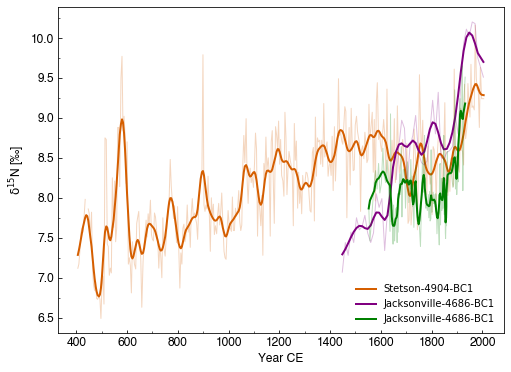

In [14]:
fig, ax = plt.subplots(figsize = (8,6))

window = 5
windowtype = 'blackman'
alpha = 0.25

data = df_stet
data.loc[:,'rolling'] = data["d15n"].rolling(15, win_type= windowtype, center = True, min_periods = 1).mean()
ax.plot('yrAD', 'd15n', data=data, color = '#D55E00', linewidth = 1, label = '', alpha = alpha)
ax.plot('yrAD', 'rolling', data=data, color = '#D55E00', linewidth = 2, label = 'Stetson-4904-BC1')

data = df_jack4686_mill
data.loc[:,'rolling'] = data["d15n"].rolling(10, win_type= windowtype, center = True, min_periods = 1).mean()
ax.plot('yrAD', 'd15n', data=data, color = 'purple', linewidth = 1, label = '', alpha = alpha)
ax.plot('yrAD', 'rolling', data=data, color = 'purple', linewidth = 2, label = 'Jacksonville-4686-BC1')

data = df_jack4684
data.loc[:,'rolling'] = data["d15n"].rolling(10, win_type= windowtype, center = True, min_periods = 1).mean()
ax.plot('yrAD', 'd15n', data=data, color = 'green', linewidth = 1, label = '', alpha = alpha)
ax.plot('yrAD', 'rolling', data=data, color = 'green', linewidth = 2, label = 'Jacksonville-4686-BC1')

ax.set_xlabel("Year CE", fontname = 'Helvetica', size = 12)
ax.set_ylabel(n, fontname = 'Helvetica', size = 12)

for tick in ax.get_xticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(12)
for tick in ax.get_yticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(12)
    
ax.xaxis.set_minor_locator(MultipleLocator(100))
ax.yaxis.set_minor_locator(MultipleLocator(0.25))
ax.tick_params(direction='in', which = 'both')
# ax.set_xlim(-400, 1500)

plt.legend(frameon=False, loc=0)

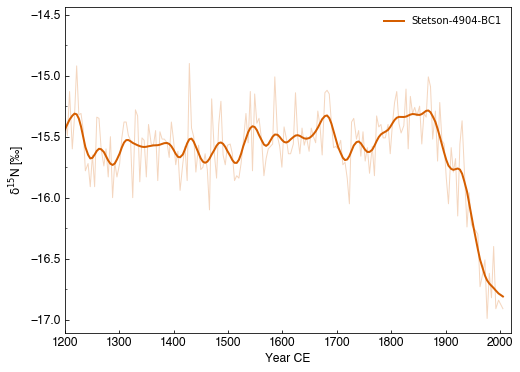

In [3]:
fig, ax = plt.subplots(figsize = (8,6))

window = 5
windowtype = 'blackman'
alpha = 0.25

data = df_stet
data.loc[:,'rolling'] = data["d13c"].rolling(15, win_type= windowtype, center = True, min_periods = 1).mean()
ax.plot('yrAD', 'd13c', data=data, color = '#D55E00', linewidth = 1, label = '', alpha = alpha)
ax.plot('yrAD', 'rolling', data=data, color = '#D55E00', linewidth = 2, label = 'Stetson-4904-BC1')

ax.set_xlabel("Year CE", fontname = 'Helvetica', size = 12)
ax.set_ylabel(n, fontname = 'Helvetica', size = 12)

for tick in ax.get_xticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(12)
for tick in ax.get_yticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(12)
    
ax.xaxis.set_minor_locator(MultipleLocator(100))
ax.yaxis.set_minor_locator(MultipleLocator(0.25))
ax.tick_params(direction='in', which = 'both')
ax.set_xlim(1200, 2020)

plt.legend(frameon=False, loc=0)

## Estimating fraction of N fixation

Nfix = 1 - [(d15Np - d15Nfix)/(d15Nnitrate - d15Nfix)]

In [36]:
nfix = 0
d15Nnitrate = 12
data = df_stet
data['Nfix'] = (((data['d15n'] - nfix)/(d15Nnitrate - nfix)))
Fnfix = 1-((9 - nfix)/(d15Nnitrate - nfix))
Fnfix

/Users/jts/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


0.25

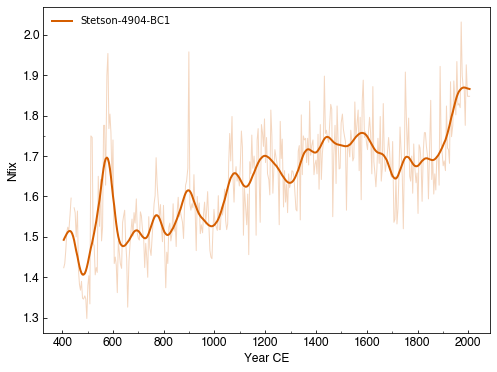

In [22]:
fig, ax = plt.subplots(figsize = (8,6))

window = 5
windowtype = 'blackman'
alpha = 0.25

data = df_stet
data.loc[:,'rolling'] = data["Nfix"].rolling(30, win_type= windowtype, center = True, min_periods = 1).mean()
ax.plot('yrAD', 'Nfix', data=data, color = '#D55E00', linewidth = 1, label = '', alpha = alpha)
ax.plot('yrAD', 'rolling', data=data, color = '#D55E00', linewidth = 2, label = 'Stetson-4904-BC1')

ax.set_xlabel("Year CE", fontname = 'Helvetica', size = 12)
ax.set_ylabel("Nfix", fontname = 'Helvetica', size = 12)

for tick in ax.get_xticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(12)
for tick in ax.get_yticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(12)
    
ax.xaxis.set_minor_locator(MultipleLocator(100))
ax.yaxis.set_minor_locator(MultipleLocator(0.25))
ax.tick_params(direction='in', which = 'both')
# ax.set_xlim(-400, 1500)

plt.legend(frameon=False, loc=0)

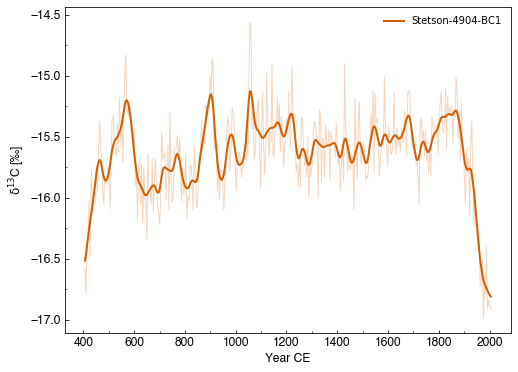

In [18]:
fig, ax = plt.subplots(figsize = (8,6))

window = 5
windowtype = 'blackman'
alpha = 0.25

data = df_stet
data.loc[:,'rolling'] = data["d13c"].rolling(15, win_type= windowtype, center = True, min_periods = 1).mean()
ax.plot('yrAD', 'd13c', data=data, color = '#D55E00', linewidth = 1, label = '', alpha = alpha)
ax.plot('yrAD', 'rolling', data=data, color = '#D55E00', linewidth = 2, label = 'Stetson-4904-BC1')

ax.set_xlabel("Year CE", fontname = 'Helvetica', size = 12)
ax.set_ylabel(c, fontname = 'Helvetica', size = 12)

for tick in ax.get_xticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(12)
for tick in ax.get_yticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(12)
    
ax.xaxis.set_minor_locator(MultipleLocator(100))
ax.yaxis.set_minor_locator(MultipleLocator(0.25))
ax.tick_params(direction='in', which = 'both')
# ax.set_xlim(-400, 1500)

plt.legend(frameon=False, loc=0)